In [1]:
import os
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
%run train_toycar.py

FILEHOME = os.path.abspath(os.path.curdir)
datapath = FILEHOME + '/data_output_50Hz_short_small.txt'
solverpath = FILEHOME + '/toycar_solver.prototxt'
structurepath = FILEHOME + '/toycar_2fc_hdf5.prototxt'
deploypath = FILEHOME + '/toycar_2fc_deploy.prototxt'
weightspath = FILEHOME + '/2fc_iter_20001.caffemodel'

model = Model(datapath)
mlp = Network(model, solverpath, structurepath, deploypath, weightspath)
gp = SGPRegression(model)


done Reading


/home/colin/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
gp.train()

 /home/colin/anaconda2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning:The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.


In [2]:
mlp.train()

In [ ]:
nnpred = mlp.test(mlp.test_data[:1000,:])
nnpred_diff = np.sum(np.abs(pred - mlp.test_labels[:1000,:]), axis=1)


In [3]:
gpdata = gp.test_data[:10000, :]
gplabels = gp.test_labels[:10000, :]
gppred = gp.test(gpdata)[0]

gppred_diff = np.sum(np.abs(gppred - gplabels), axis=1)

In [ ]:
nndata = mlp.test

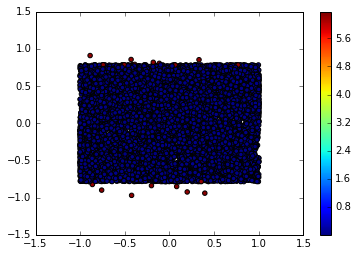

In [11]:
gp.plot2d(data[:, 1], data[:, 2], c=gppred_diff)

In [16]:
np.square(gppred_diff)

array([ 0.00255658,  0.00162569,  0.00123256, ...,  0.00566454,
        0.00021104,  0.00116609])

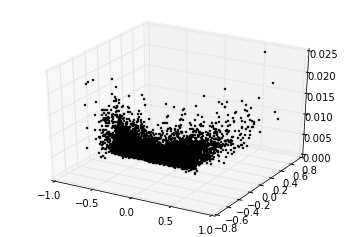

In [105]:
fig = plt.figure()
ax = plt.subplot(111, projection='3d')
ax.plot(mlp.test_data[:10000,0],mlp.test_data[:10000,1],
       pred_diff, 'o', , ms=2)